In [1]:
import sys
sys.path.insert(0, "can_reproducibility/PopV")
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import popv
import importlib

From /home/cane/miniconda3/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:107: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
Created a temporary directory at /tmp/tmpktwb_aub
Writing /tmp/tmpktwb_aub/_remote_module_non_scriptable.py
Global seed set to 0


In [2]:
DPI = 600

In [3]:
adata = anndata.read('can_reproducibility/thymus_models/thymus_annotation/annotation/query_and_reference_final.h5ad')
adata = adata[adata.obs['_dataset']=='query']

In [4]:
adata

View of AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilit

In [5]:
adata

View of AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilit

In [6]:
adata.obs['paper_annotation']

4861STDY7462263-GGTGAAGCACGGCTAC                                    regulatory T cell
4861STDY7462261-CCTAGCTGTCCAACTA                double-positive, alpha-beta thymocyte
4861STDY7462261-CCTAGCTGTAGCTGCC                                    regulatory T cell
4861STDY7462261-CCTAGCTCATGTAGTC                double-positive, alpha-beta thymocyte
4861STDY7462261-CCTAGCTCAGCTGTGC                                        memory B cell
                                                          ...                        
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT                                    alpha-beta T cell
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC    CD8-alpha-alpha-positive, alpha-beta intraepit...
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT                                       dendritic cell
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT                                    alpha-beta T cell
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG                                    regulatory T cell
Name: paper_annotation, Length: 255901, dtype: categor

In [7]:
from popv.reproducibility import _alluvial

In [8]:
adata.obs["paper_annotation"] = adata.obs["paper_annotation"].astype(str) + ' '

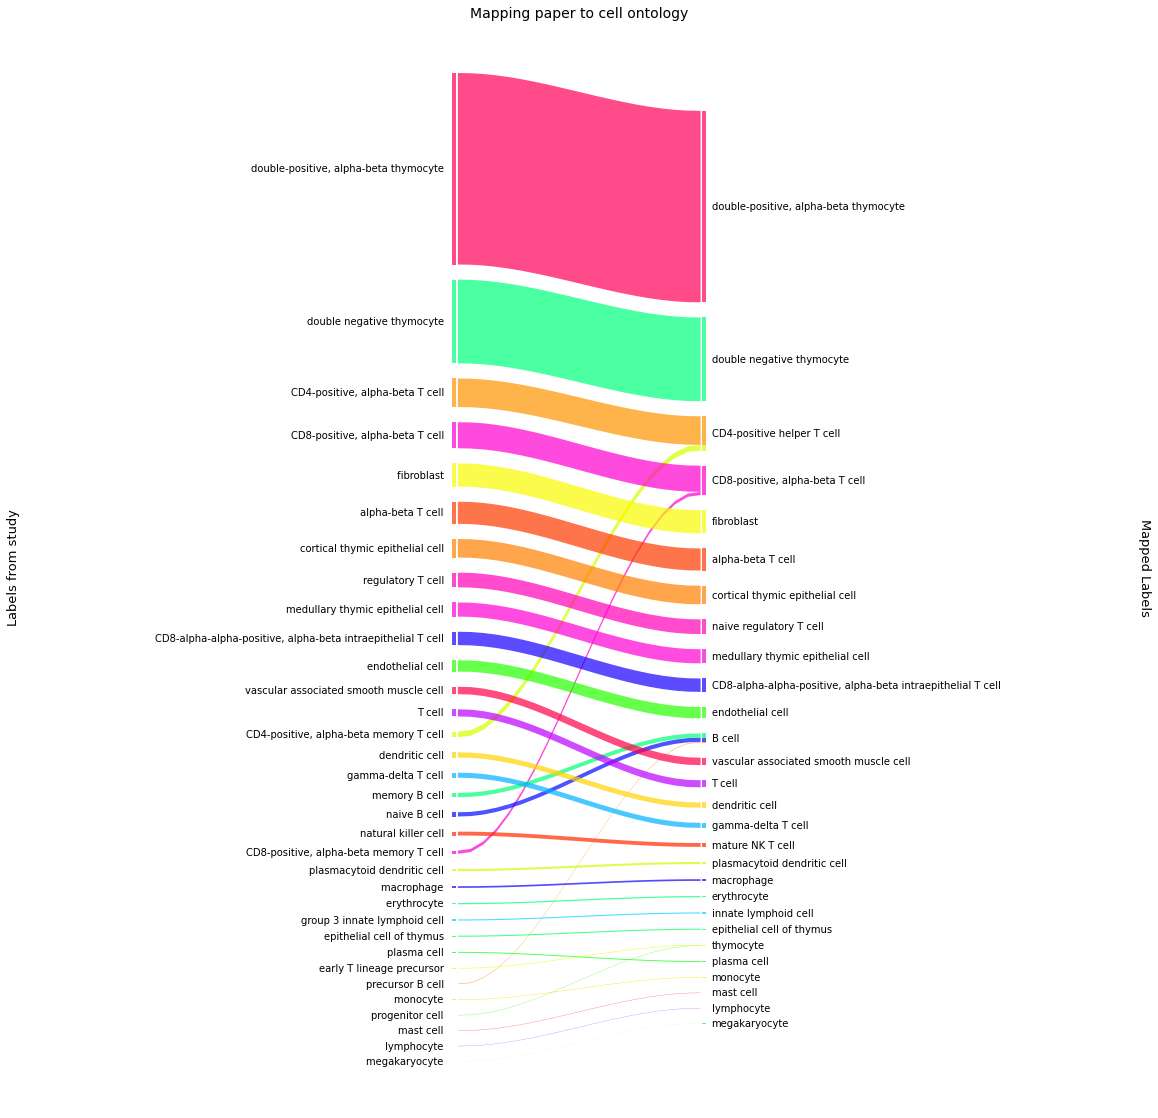

In [9]:
input_data = adata.obs[["paper_annotation", "cell_ontology_class"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "Mapped Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to cell ontology', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig4/fig4_alluvial_study_to_ont_labels.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

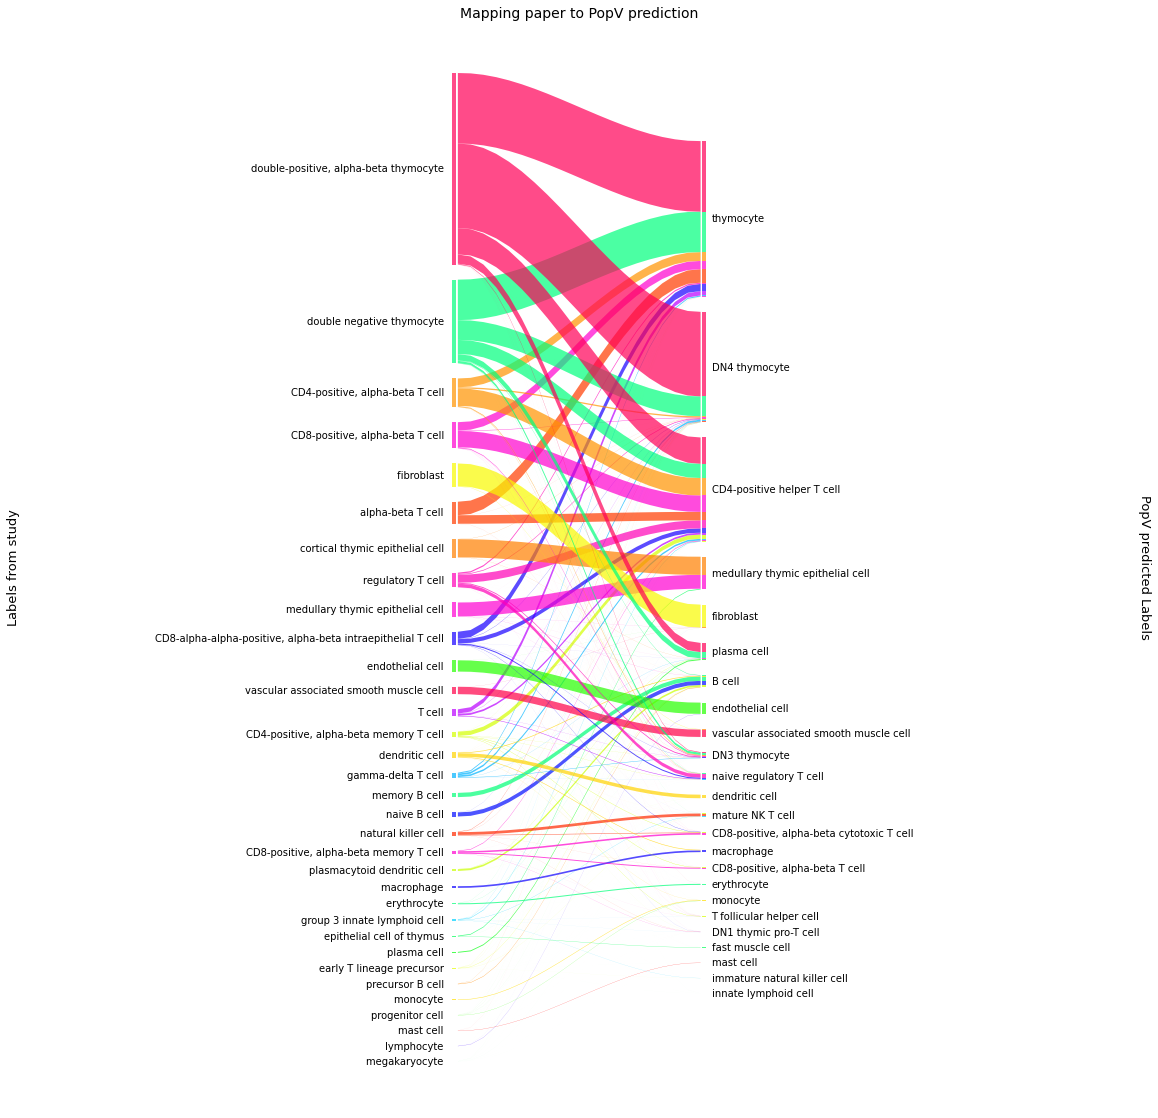

In [13]:
input_data = adata.obs[["paper_annotation", "popv_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "PopV predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to PopV prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig4/fig4_alluvial_study_to_popv_prediction.pdf", dpi=DPI, bbox_inches="tight")
plt.show()